   AgeGap  IncomeGap  SameSpending  SamePersonality  SamePlanner  \
0       4       2372             1                1            1   
1       2       3147             1                1            1   
2      11       3080             0                1            1   
3       6        122             1                1            1   
4       1        915             1                1            0   

   SharedHobbies  SharedMusic  GoodFriends  
0              2            0            1  
1              2            1            1  
2              2            0            0  
3              2            1            1  
4              1            1            1  

✅ Logistic Regression Accuracy: 0.9965
✅ Decision Tree Accuracy: 0.9225
✅ Random Forest Accuracy: 0.983


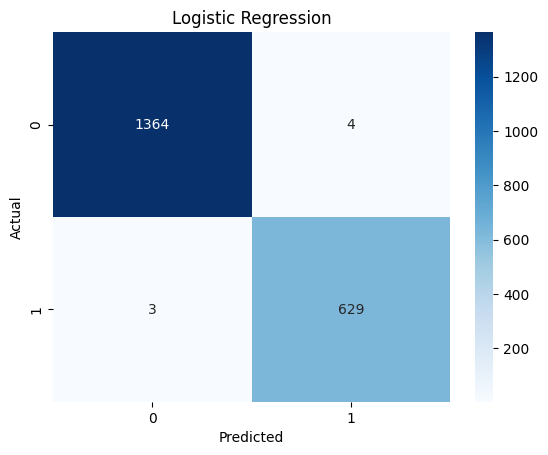

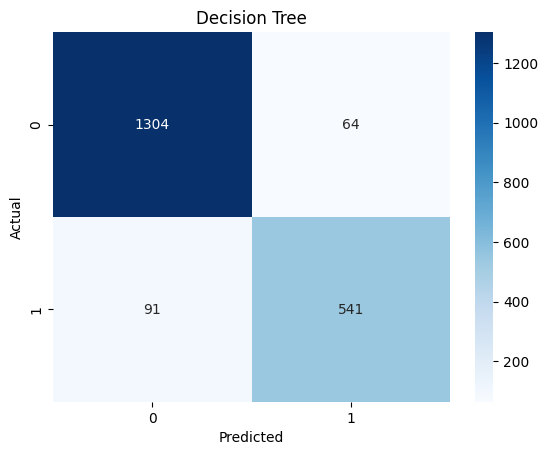

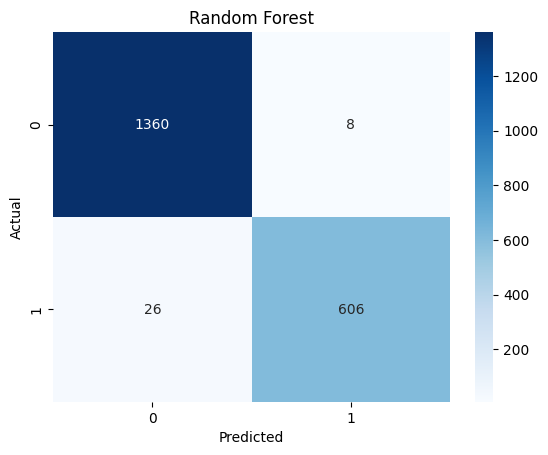


✅ Logistic Regression AUC: 0.9999155655488934
✅ Decision Tree AUC: 0.9761628821526389
✅ Random Forest AUC: 0.9989578706788067


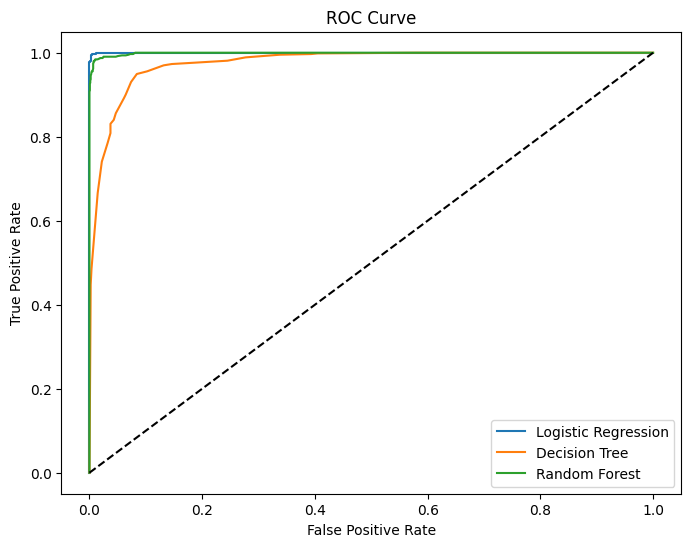


✅ Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1368
           1       0.99      1.00      0.99       632

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


✅ Decision Tree Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1368
           1       0.89      0.86      0.87       632

    accuracy                           0.92      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000


✅ Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1368
           1       0.99      0.96      0.97       632

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98 

In [1]:
# STEP 1 — IMPORTS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2 — LOAD DATA
df = pd.read_csv('friendship_pairs.csv')
print(df.head())

# STEP 3 — Split features/target
X = df.drop('GoodFriends', axis=1)
y = df['GoodFriends']

# STEP 4 — Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5 — Models
logreg = LogisticRegression(max_iter = 1000)
tree = DecisionTreeClassifier(max_depth=5)
forest = RandomForestClassifier(n_estimators=100)

# Fit all
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

# Predictions
logreg_pred = logreg.predict(X_test)
tree_pred = tree.predict(X_test)
forest_pred = forest.predict(X_test)

# STEP 6 — Accuracy
print("\n✅ Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("✅ Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("✅ Random Forest Accuracy:", accuracy_score(y_test, forest_pred))

# STEP 7 — Confusion Matrix
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion(y_test, logreg_pred, "Logistic Regression")
plot_confusion(y_test, tree_pred, "Decision Tree")
plot_confusion(y_test, forest_pred, "Random Forest")

# STEP 8 — ROC-AUC
logreg_probs = logreg.predict_proba(X_test)[:,1]
tree_probs = tree.predict_proba(X_test)[:,1]
forest_probs = forest.predict_proba(X_test)[:,1]

logreg_auc = roc_auc_score(y_test, logreg_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
forest_auc = roc_auc_score(y_test, forest_probs)

print("\n✅ Logistic Regression AUC:", logreg_auc)
print("✅ Decision Tree AUC:", tree_auc)
print("✅ Random Forest AUC:", forest_auc)

# Plot ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)
fpr_forest, tpr_forest, _ = roc_curve(y_test, forest_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# STEP 9 — Classification Report
print("\n✅ Logistic Regression Report:\n", classification_report(y_test, logreg_pred))
print("\n✅ Decision Tree Report:\n", classification_report(y_test, tree_pred))
print("\n✅ Random Forest Report:\n", classification_report(y_test, forest_pred))
import joblib
joblib.dump(logreg, "logtree_model.pkl")
joblib.dump(forest, "forest_model.pkl")
joblib.dump(tree, "decision_model.pkl")
print("✅ all model files are saved ")

